## Retrieve data using FRED API

In [2]:
import pandas_datareader.data as dtr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker = ['GS1','GS2','GS3','GS5','GS7','GS10']



In [3]:
## intall FRED API 
!pip install fredapi
## Import modules and Packages
import fredapi as fa
import pandas as pd
#from local_settings import fred as settings


In [4]:
fred = fa.Fred('021f2202f7211697a094d293f015057e')

In [5]:
## get series
treasury_list = []
for idx in ticker:
    treasury = fred.get_series(idx)
    treasury.name = idx
    treasury_list.append(treasury)


In [6]:
# merge time sereies to a dataframe
yieldcurve = pd.concat(treasury_list, axis=1).dropna()
yieldcurve.to_csv('yieldcurve.csv')
headers = ['date', '1y', '2y', '3y', '5y', '7y', '10y'] 
yieldcurve = pd.read_csv('yieldcurve.csv', index_col=0, parse_dates=True, header=0, names=headers)

In [7]:
yieldcurve

,1y,2y,3y,5y,7y,10y
date,,,,,,
1976-06-01,6.52,7.06,7.31,7.61,7.75,7.86
1976-07-01,6.20,6.85,7.12,7.49,7.70,7.83
1976-08-01,6.00,6.63,6.86,7.31,7.58,7.77
1976-09-01,5.84,6.42,6.66,7.13,7.41,7.59
1976-10-01,5.50,5.98,6.24,6.75,7.16,7.41
...,...,...,...,...,...,...
2021-06-01,0.07,0.20,0.39,0.84,1.23,1.52
2021-07-01,0.08,0.22,0.40,0.76,1.07,1.32
2021-08-01,0.07,0.22,0.42,0.77,1.06,1.28


## Calculate Percentage Change

In [8]:
yield_pct=yieldcurve.pct_change().dropna()
yield_pct

,1y,2y,3y,5y,7y,10y
date,,,,,,
1976-07-01,-0.049080,-0.029745,-0.025992,-0.015769,-0.006452,-0.003817
1976-08-01,-0.032258,-0.032117,-0.036517,-0.024032,-0.015584,-0.007663
1976-09-01,-0.026667,-0.031674,-0.029155,-0.024624,-0.022427,-0.023166
1976-10-01,-0.058219,-0.068536,-0.063063,-0.053296,-0.033738,-0.023715
1976-11-01,-0.038182,-0.028428,-0.024038,-0.034074,-0.041899,-0.016194
...,...,...,...,...,...,...
2021-06-01,0.400000,0.250000,0.218750,0.024390,-0.039062,-0.061728
2021-07-01,0.142857,0.100000,0.025641,-0.095238,-0.130081,-0.131579
2021-08-01,-0.125000,0.000000,0.050000,0.013158,-0.009346,-0.030303


In [9]:
yield_pct.describe()

,1y,2y,3y,5y,7y,10y
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,-0.000742,0.000454,0.000956,0.000271,-0.000446,-0.000974
std,0.110230,0.103354,0.101139,0.086223,0.072525,0.061456
min,-0.765957,-0.661654,-0.618321,-0.553030,-0.450704,-0.420000
25%,-0.043281,-0.043096,-0.042041,-0.039199,-0.034442,-0.032287
50%,0.000000,0.000000,-0.002960,-0.003198,-0.003815,-0.003580
75%,0.037175,0.043347,0.042876,0.035444,0.032508,0.030173
max,0.846154,0.625000,0.523810,0.518519,0.395604,0.277778


We can see that the standard deviation is decreasing in time to maturity.

## Derive the Correlation Matrix

In [10]:
yield_pct_corr=yield_pct.corr()
yield_pct_corr

,1y,2y,3y,5y,7y,10y
1y,1.000000,0.818125,0.733237,0.639476,0.603910,0.567477
2y,0.818125,1.000000,0.960821,0.879459,0.828389,0.769381
3y,0.733237,0.960821,1.000000,0.957641,0.910382,0.846371
5y,0.639476,0.879459,0.957641,1.000000,0.983190,0.941722
7y,0.603910,0.828389,0.910382,0.983190,1.000000,0.979112
10y,0.567477,0.769381,0.846371,0.941722,0.979112,1.000000


1y,2y,...,10y data is highly correlated, as can be seen in the correlation matrix. Therefore, we can perform PCA to reduce the dimension of these data.

## Calculate the eigenvalues of the correlation matrix

In [11]:

yield_eig_value, yield_eig_vector = np.linalg.eig(yield_pct_corr)
yield_eig_value

array([5.16736063e+00, 6.07957130e-01, 1.76190878e-01, 3.54479997e-02,
       8.75412557e-03, 4.28924026e-03])

In [12]:
print('Total variation of the data(sum of eigenvalues):',np.sum(yield_eig_value))
print('The first one component explain {0} percent of variance;\nThe first two components explain {1} percent of variance;\nThe first three components explain {2} percent of variance'.format(yield_eig_value[0]/np.sum(yield_eig_value),np.sum(yield_eig_value[0:2])/np.sum(yield_eig_value),np.sum(yield_eig_value[0:3])/np.sum(yield_eig_value)))

Total variation of the data(sum of eigenvalues): 6.000000000000002
The first one component explain 0.8612267710670434 percent of variance;
The first two components explain 0.9625529594717078 percent of variance;
The first three components explain 0.9919181057531493 percent of variance


The correlation matrix is positive semi-definite because all the eigenvalue is positive.

## Decide the reduced dimension

In [13]:
yield_eig_vector_df=pd.DataFrame(yield_eig_vector[:,0:3].T,columns=yield_pct.columns)
print("Factor loading:\n",yield_eig_vector_df)

Factor loading:
          1y        2y        3y        5y        7y       10y
0  0.339500  0.415248  0.429034  0.429792  0.422343  0.406379
1  0.765726  0.295314  0.047039 -0.232526 -0.333107 -0.399013
2  0.515294 -0.481801 -0.477732 -0.102554  0.190352  0.476823


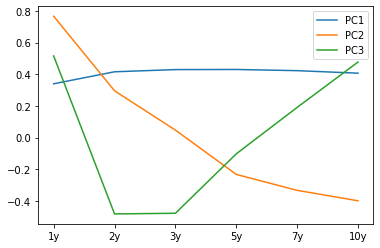

In [14]:
yield_eig_vector_df.iloc[0].plot(label='PC1')
yield_eig_vector_df.iloc[1].plot(label='PC2')
yield_eig_vector_df.iloc[2].plot(label='PC3')
plt.legend()
plt.show()

In [15]:
np.cumsum(yield_eig_value)/np.sum(yield_eig_value)

array([0.86122677, 0.96255296, 0.99191811, 0.99782611, 0.99928513,
       1.        ])

[ 86.12267711  96.25529595  99.19181058  99.78261057  99.92851266
 100.        ]


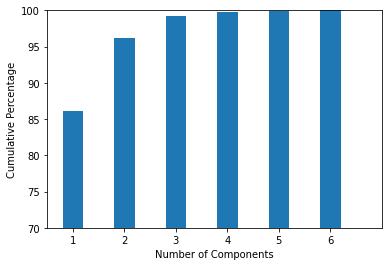

In [55]:
perc_array = 100 * np.cumsum(yield_eig_value)/np.sum(yield_eig_value)
print(perc_array)
name = ['1','2','3','4','5','6']
plt.axis([-0.5, 6, 70, 100])
plt.ylabel('Cumulative Percentage')
plt.xlabel('Number of Components')
plt.bar(name,perc_array,width = 0.4)
plt.show()

We need two principal components to explain more than 95% of the total variation in the change of yield curve.
The definition of the total variation is the sum of all the deviations from the mean. For the standardized data, it's easy to know that the sum of the variances would be 6.

##Standardize the initial data and Project it from 6D to 2D

In [17]:
from sklearn.preprocessing import StandardScaler
features = yield_pct.columns
# Separating out the features
x = yield_pct.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
stand_data = yield_pct.copy()
stand_data[stand_data.columns] = x

In [18]:
stand_corr = stand_data.corr()
stand_corr 

,1y,2y,3y,5y,7y,10y
1y,1.000000,0.818125,0.733237,0.639476,0.603910,0.567477
2y,0.818125,1.000000,0.960821,0.879459,0.828389,0.769381
3y,0.733237,0.960821,1.000000,0.957641,0.910382,0.846371
5y,0.639476,0.879459,0.957641,1.000000,0.983190,0.941722
7y,0.603910,0.828389,0.910382,0.983190,1.000000,0.979112
10y,0.567477,0.769381,0.846371,0.941722,0.979112,1.000000


In [19]:
stand_eig_value, stand_eig_vector = np.linalg.eig(stand_corr)
np.sum(stand_eig_value)

5.999999999999999

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_d = pca.fit_transform(x)
proj_data = pd.DataFrame(data = principalComponents_d
             , columns = ['principal component 1', 'principal component 2'])

In [21]:
proj_data.index = yield_pct.index
proj_data

,principal component 1,principal component 2
date,,
1976-07-01,0.518720,-0.345623
1976-08-01,0.641005,-0.151060
1976-09-01,0.736176,0.026316
1976-10-01,1.338270,-0.181314
1976-11-01,0.851404,0.027636
...,...,...
2021-06-01,-2.656800,4.108693
2021-07-01,1.148742,2.997158
2021-08-01,0.358341,-0.645708


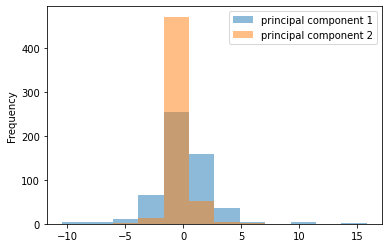

In [76]:
# the histogram of the data

ax = proj_data.plot.hist(bins=12, alpha=0.5, label = 'treasury yield' )


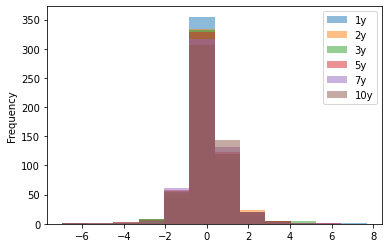

In [56]:
ax = stand_data.plot.hist(bins=12, alpha=0.5)

## Validate the stability

In [77]:
## adding perurbation to the original data
original_data = yield_pct[yield_pct.columns].to_numpy()
K = 0.1
perturbation = np.zeros(original_data.shape)
for j in range(original_data.shape[1]):
    N = np.random.normal(0,np.std(original_data[:,j]),original_data.shape[0])
    perturbation[:,j] = original_data[:,j] + K * N

In [78]:
from sklearn.preprocessing import StandardScaler
# features = perturbation.columns
# # Separating out the features
# x = perturbation.loc[:, features].values
# # Separating out the target
# #y = df.loc[:,['target']].values
# # Standardizing the features
x = StandardScaler().fit_transform(perturbation)
stand_perturbation = yield_pct.copy()
stand_perturbation[stand_perturbation.columns] = x

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_p = pca.fit_transform(x)
proj_perturbation = pd.DataFrame(data = principalComponents_p
             , columns = ['principal component 1', 'principal component 2'])

In [80]:
proj_perturbation

,principal component 1,principal component 2
0,0.512635,-0.296026
1,0.678828,-0.233770
2,0.820905,0.096977
3,1.263190,-0.244335
4,0.828539,0.045216
...,...,...
539,-2.763068,4.062181
540,1.184385,2.941107
541,0.374259,-0.484755
542,-2.699181,0.181466


In [81]:
import scipy.stats
#correlat_matrix = np.corrcoef(proj_data, proj_perturbation)
correlat_matrix = np.zeros((2,2))
correlat_matrix[0,0] = scipy.stats.pearsonr(principalComponents_d[:,0], principalComponents_p[:,0])[0]
correlat_matrix[0,1] = scipy.stats.pearsonr(principalComponents_d[:,0], principalComponents_p[:,1])[0]
correlat_matrix[1,0] = scipy.stats.pearsonr(principalComponents_d[:,1], principalComponents_p[:,0])[0]
correlat_matrix[1,1] = scipy.stats.pearsonr(principalComponents_d[:,1], principalComponents_p[:,1])[0]

In [29]:
correlat_matrix

array([[ 9.96070536e-01,  6.99116534e-04],
       [-9.28166624e-04,  9.71701140e-01]])

In [82]:
df = pd.DataFrame(correlat_matrix, columns = ['PC1(perturbated)','PC2(perturbated)'], index = ['PC1(original)', 'PC2(original)'])
df

,PC1(perturbated),PC2(perturbated)
PC1(original),0.998980,0.000096
PC2(original),-0.000004,0.991223


## Calculate MSE to find the most similar year

In [83]:
all_year = yield_pct.iloc[2:-2][yield_pct.columns[:]].to_numpy()
target_year = all_year[-12:]
history_year = all_year[:-12]
sample = history_year.shape[0]/12
sample

44.0

In [84]:
print(target_year.shape)
print(history_year.shape)

(12, 6)
(528, 6)


In [85]:
from sklearn.metrics import mean_squared_error
MSE_list = []
for i in range(int(sample)):
    MSE_list.append(mean_squared_error(target_year, history_year[12*i:12*(i+1)]))
print(MSE_list)


[0.030233546315541763, 0.02642324808801219, 0.028568838265626895, 0.03053657706703256, 0.03327732534037727, 0.03580479219487148, 0.033398443404172785, 0.026384921402518333, 0.03021873636482901, 0.03749398811662923, 0.03180784067187309, 0.03159185315680251, 0.02955212657741744, 0.027900822243681317, 0.02662906595610885, 0.027405008096179476, 0.029919720785062217, 0.0250513662564209, 0.03303475976924882, 0.023242057127541838, 0.028219473386328086, 0.029213453403005848, 0.02819718604116299, 0.031279850002424066, 0.033710056361267476, 0.03202138920070625, 0.043522605162573454, 0.040029278444180486, 0.025110934412161143, 0.02440125135816108, 0.03078818237045035, 0.04820136346765746, 0.053211703102485124, 0.03891308503786415, 0.06943334252708673, 0.032401621099649176, 0.038053946729414784, 0.032051523086953096, 0.05173380688917739, 0.053665405843755114, 0.030817507636100767, 0.026504911518250084, 0.03892090415858561, 0.10860385636073361]


In [86]:
min_value = min(MSE_list)
print('The most similar year is: ', 1976 + MSE_list.index(min_value))

The most similar year is:  1995


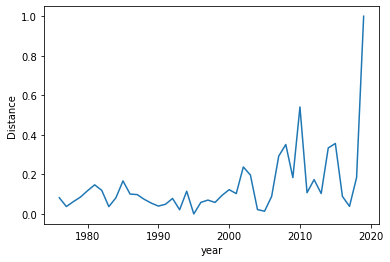

In [103]:
plt.plot(np.arange(1976,2020),[(float(i)-min(MSE_list))/(max(MSE_list)-min(MSE_list)) for i in MSE_list])
#plt.xaxis([1976, 2019])
plt.ylabel('Distance')
plt.xlabel('year')

plt.show()

## Dynamic Time Wrapping (DTW) method to find the most similar year

In [35]:
!pip install dtw-python

     |████████████████████████████████| 580 kB 11.4 MB/s 


In [110]:
history_year.shape

(528, 6)

In [112]:
target_year.shape

(12, 6)

In [113]:
from dtw import *
distance_list = []
for i in range(int(sample)):
    alignment = dtw(target_year, history_year[12*i:12*(i+1)], keep_internals=True)
    distance_list.append(alignment.distance)


    ## Display the warping curve, i.e. the alignment curve
    #alignment.plot(type="threeway")
    #print(alignment.distance)


In [104]:
min_value = min(distance_list)
print('The most similar year is: ', 1976 + distance_list.index(min_value),distance_list.index(min_value))

The most similar year is:  2006 30


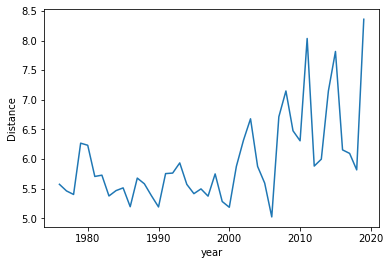

In [102]:
plt.plot(np.arange(1976,2020),distance_list)
plt.ylabel('Distance')
plt.xlabel('year')
plt.show()

In [40]:
print(numpy.argsort(MSE_list)[:10])
print(numpy.argsort(distance_list)[:10])

[41 23 29 13  1  4 10  7  0 17]
[30 24 14 10 23 21  7 13  2 19]
